In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_data_svd(data_path=None, final_data_path=None, r=100):
    '''
    This function applies an SVD routine to compress the images passed here and saves
    the image in a given directory.

    Args:
        data_path: original data directory
        final_data_path: final (processed) data directory
        r: level of compression (the smaller the r, the bigger the compression)

    Returns:
        .png compressed image.
    '''
    progress = 0
    for filename in os.listdir(data_path)[:]:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # read each image
            image = cv2.imread(os.path.join(data_path, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # applies svd
            U, S, Vt = np.linalg.svd(image, full_matrices=False)
            S = np.diag(S)
            image_compressed = U[:,:r] @ S[:r,:r] @ Vt[:r,:]
            if final_data_path != None:
                cv2.imwrite(filename=final_data_path + '/{}_comp.png'.format(filename[:-4]),
                           img=image_compressed)
        progress += 1
        print('Progress: {:.2f}%'.format(((len(os.listdir(data_path)[:]) - progress)/len(os.listdir(data_path)[:]))*100),
              end='\r')

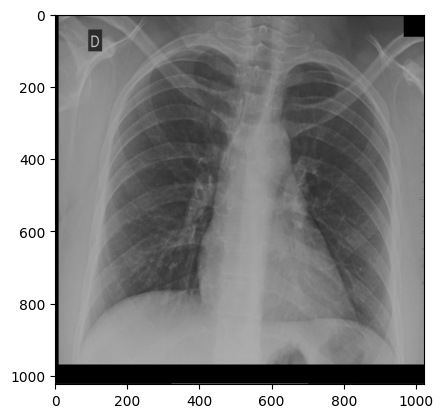

In [9]:
# Original image:
plt.imshow(cv2.imread('/Users/rodrigosilva/Downloads/images/000000.png'))

### Processing with $r=100$:

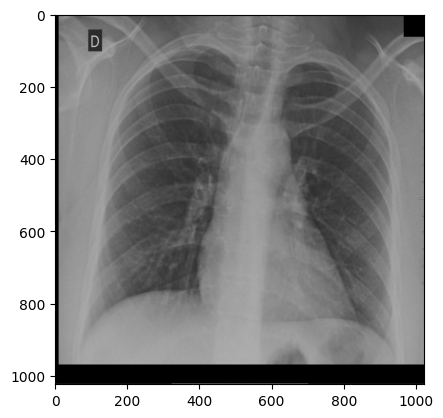

In [10]:
# Compressed image

get_data_svd(data_path='/Users/rodrigosilva/Downloads/images',
            final_data_path='/Users/rodrigosilva/Downloads/images_processed')

plt.imshow(cv2.imread('/Users/rodrigosilva/Downloads/images_processed/000000_comp.png'))

### Processing with $r=75$:

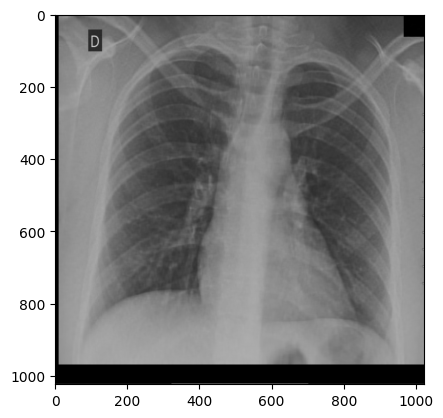

In [11]:
# Compressed image

get_data_svd(data_path='/Users/rodrigosilva/Downloads/images',
            final_data_path='/Users/rodrigosilva/Downloads/images_processed',
            r=75)

plt.imshow(cv2.imread('/Users/rodrigosilva/Downloads/images_processed/000000_comp.png'))

### Processing with $r=50$:

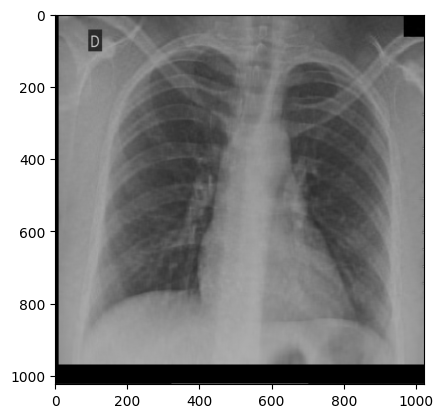

In [12]:
# Compressed image

get_data_svd(data_path='/Users/rodrigosilva/Downloads/images',
            final_data_path='/Users/rodrigosilva/Downloads/images_processed',
            r=50)

plt.imshow(cv2.imread('/Users/rodrigosilva/Downloads/images_processed/000000_comp.png'))